# Market segmentation

#### Anisha Singh (as229583), Antra Sinha (as224589), Hayoung Kim (hk26786), Meenakshi Sundaram (ms88544)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
tweet = pd.read_csv('social_marketing.csv')

Drop the noise-making or useless column for analysis

In [3]:
# Drop the rows that have numbers in 'spam' or 'adult' (about 580 rows)
mask1 = tweet['spam'] == 0
mask2 = tweet['adult'] == 0
tweet = tweet[mask1]
tweet = tweet[mask2]

# Drop the spam, adult column
tweet.drop(['spam', 'adult'],axis=1 , inplace=True)

# Also drop the 9-digit alphanumeric code because it's useless for analysis
tweet = tweet.drop('Unnamed: 0', axis =1)

/var/folders/9m/mbcz94nd0x56sh8gf16ky2680000gn/T/ipykernel_50063/4161812086.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tweet = tweet[mask2]


For the 'uncategorized' or 'chatter' columns, I'll consider later how to dispose them after having analysis results.

### 1. Heatmap - to discover high correlations

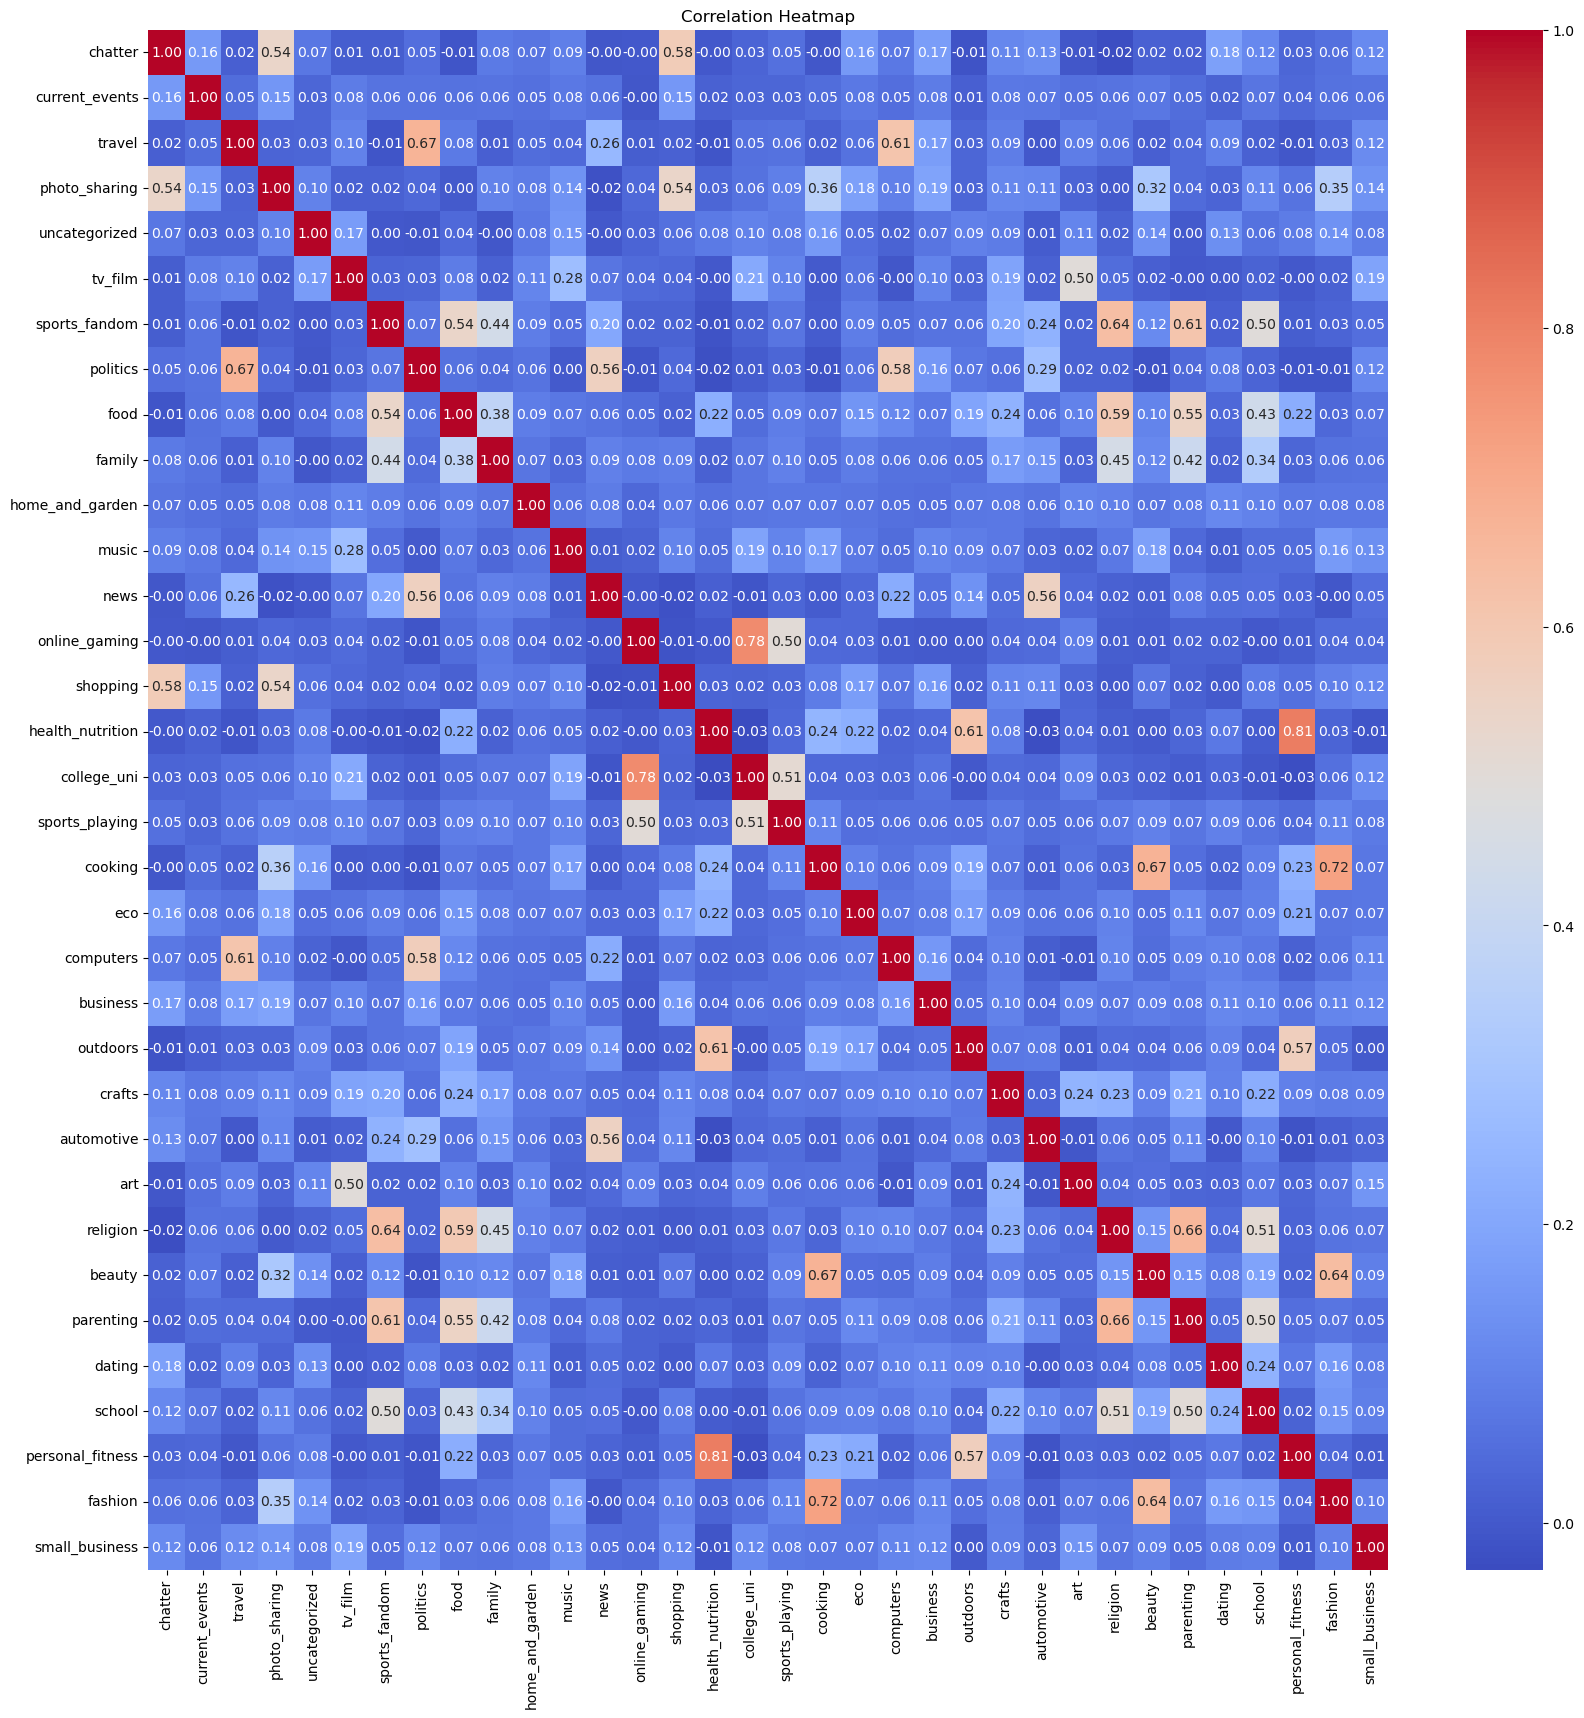

In [4]:
plt.figure(figsize = (20,20))

# Calculate the correlation matrix
correlation_matrix = tweet.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Considering that a correlation of 0.6 or higher is typically regarded as a strong correlation, I would like to set a slightly higher threshold of 0.7 for my analysis.

In [5]:
# Filter the correlation that has values >= 0.7
threshold_low = 0.7
threshold_high = 1.0
high_correlation = correlation_matrix[(correlation_matrix >= threshold_low) & (correlation_matrix < threshold_high)].stack()

# Print the high correlation values along with their column names
for (col1, col2), value in high_correlation.items():
    print(f"Correlation between '{col1}' and '{col2}': {value:.2f}")

Correlation between 'online_gaming' and 'college_uni': 0.78
Correlation between 'health_nutrition' and 'personal_fitness': 0.81
Correlation between 'college_uni' and 'online_gaming': 0.78
Correlation between 'cooking' and 'fashion': 0.72
Correlation between 'personal_fitness' and 'health_nutrition': 0.81
Correlation between 'fashion' and 'cooking': 0.72


> ### According to the correlation matrix, the high correlations are as follows :
> 1. online_gaming & college_uni: 0.78
> 2. cooking & fashion: 0.72
> 3. health_nutrition & personal_fitness: 0.81


Indeed, this tendency is shown as a linear relationship in the scatterplots below

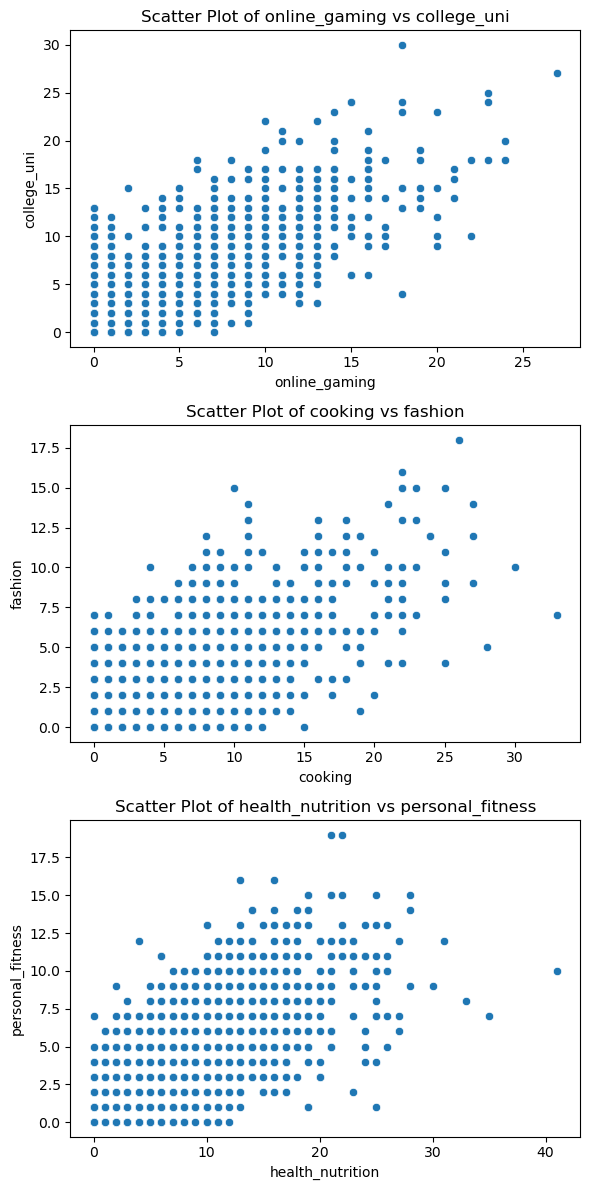

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample pairs of highly correlated variables; replace with your variables
pairs = [
    ('online_gaming', 'college_uni'),
    ('cooking', 'fashion'),
    ('health_nutrition', 'personal_fitness')
]

# Create a subplot with 3 plots
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Iterate through the pairs and plot each scatter plot
for i, (x_var, y_var) in enumerate(pairs):
    sns.scatterplot(x=x_var, y=y_var, data=tweet, ax=axes[i])
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)
    axes[i].set_title(f'Scatter Plot of {x_var} vs {y_var}')

plt.tight_layout()
plt.show()

### 2. PCA - to discover the most impacting variables

In [7]:
tweet.columns

Index(['chatter', 'current_events', 'travel', 'photo_sharing', 'uncategorized',
       'tv_film', 'sports_fandom', 'politics', 'food', 'family',
       'home_and_garden', 'music', 'news', 'online_gaming', 'shopping',
       'health_nutrition', 'college_uni', 'sports_playing', 'cooking', 'eco',
       'computers', 'business', 'outdoors', 'crafts', 'automotive', 'art',
       'religion', 'beauty', 'parenting', 'dating', 'school',
       'personal_fitness', 'fashion', 'small_business'],
      dtype='object')

In [8]:
# Import the PCA module from sklearn.decomposition
from sklearn.decomposition import PCA

# Initialize PCA with 2 principal components (k=2)
pca = PCA(n_components=2)

# Transform the data using PCA to reduce the dimensionality to 2
X_pca = pca.fit_transform(tweet)

# Get the principal components (weights of original features) for the first two principal components
principal_components = pca.components_
# Get the explained variance ratio of the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Print the weights of original features for the first two principal components
for i in range(2):  # Two principal components (x and y)
    print(f"Principal Component {i+1}:")
    for j, feature_weight in enumerate(principal_components[i]):
        print(f"Feature {j+1}: {feature_weight:.4f}")
    print()

Principal Component 1:
Feature 1: 0.0731
Feature 2: 0.0156
Feature 3: 0.0066
Feature 4: 0.1240
Feature 5: 0.0244
Feature 6: 0.0050
Feature 7: 0.0192
Feature 8: 0.0016
Feature 9: 0.0942
Feature 10: 0.0176
Feature 11: 0.0136
Feature 12: 0.0237
Feature 13: 0.0146
Feature 14: 0.0131
Feature 15: 0.0491
Feature 16: 0.8139
Feature 17: 0.0011
Feature 18: 0.0166
Feature 19: 0.3320
Feature 20: 0.0389
Feature 21: 0.0152
Feature 22: 0.0131
Feature 23: 0.1448
Feature 24: 0.0213
Feature 25: 0.0036
Feature 26: 0.0200
Feature 27: 0.0257
Feature 28: 0.0583
Feature 29: 0.0280
Feature 30: 0.0385
Feature 31: 0.0205
Feature 32: 0.3913
Feature 33: 0.0932
Feature 34: 0.0051

Principal Component 2:
Feature 1: 0.6210
Feature 2: 0.0576
Feature 3: 0.1052
Feature 4: 0.4842
Feature 5: 0.0273
Feature 6: 0.0331
Feature 7: 0.0570
Feature 8: 0.1689
Feature 9: 0.0108
Feature 10: 0.0431
Feature 11: 0.0196
Feature 12: 0.0458
Feature 13: 0.0603
Feature 14: 0.1184
Feature 15: 0.2533
Feature 16: -0.2556
Feature 17: 0.1668
F

> ### According to PCA, the high coefficients are as follows :

> Principal Component 1:
> - Dominant Features: 
> 1. 'health_nutrition' (0.8139) 
> 2. 'small_business' (0.3913) 
> 3. 'business' (0.3320).
 
> Principal Component 2:
> - Dominant Features: 
> 1. 'chatter' (0.6210)
> 2. 'current_events' (0.4842)
> 3. 'food' (0.2533)
> 4. 'business' (0.2723).


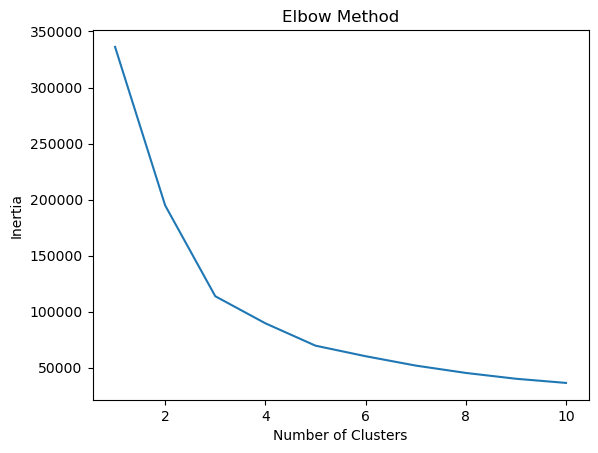

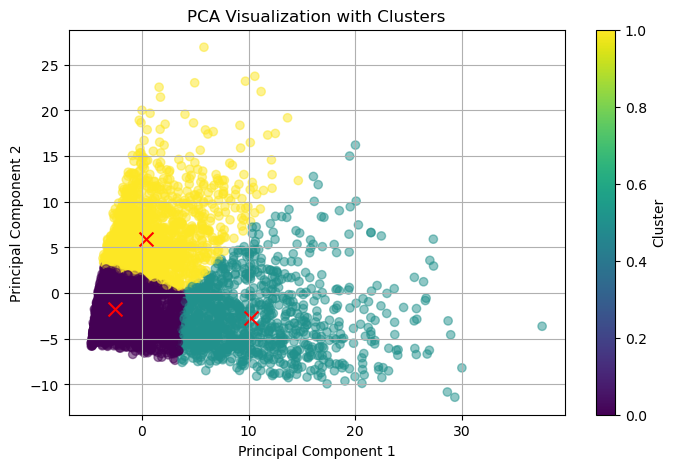

In [9]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose the optimal K (e.g., 3) and fit K-Means to the PCA results
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_pca)
clusters = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# # # Compute cluster centroids in original feature space
# cluster_centroids = pca.inverse_transform(kmeans.cluster_centers_)

# # Print the original features for the centroids of each cluster
# for i, centroid in enumerate(cluster_centroids_original_space):
#     print(f"Cluster {i}:")
#     for j, feature_weight in enumerate(centroid):
#         print(f"Feature {j+1}: {feature_weight:.4f}")
#     print()

plt.figure(figsize = (8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100) # Add this line
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


> ### Cluster Interpretation:
> - Cluster Purple:
> Wide spread along PC1, indicating diversity in 'health_nutrition', 'small_business', and 'business', which represents a diverse group of followers with varying interests in health, nutrition, and business.

> - Cluster Yellow:
> Compact and aligned along PC2, indicating similarity in 'chatter', 'current_events', 'food', and 'business'which represents followers with shared interests in social chatter, current events, and food-related topics.

> - Cluster Green:
> Compact and situated towards the positive side of PC1, indicating shared interests in 'health_nutrition', 'small_business', and 'business', which represents a segment particularly interested in health, nutrition, small businesses, and general business topics.

---

## Report for NutrientH20

### Results of analysis
Correlation Analysis:
- There is a strong positive correlation between "health_nutrition" and "personal_fitness" categories (0.81). This implies that there could be a health-conscious customer segment interested in both health nutrition and personal fitness. Targeting this group with personalized fitness programs, nutrition plans, or fitness-related products could be a good strategy.
- Considering a strong positive correlation between "online_gaming" and "college_uni" categories (0.78), there might be a segment of customers who are interested in both online gaming and college/university topics. Targeting this segment with gaming-related university campaigns or esports events on campus might be effective.
- Given a strong positive correlation between "cooking" and "fashion" categories (0.72), some customers might have an interest in both cooking and fashion. Targeting this segment with cooking-related fashion products or collaborating with chefs to promote trendy cooking styles could be beneficial.

PCA Analysis (k=2)
- The PC1 captures aspects related to health & nutrition (0.8139), business (0.3320), and small businesses(0.3913). Followers with high scores on PC1 may have a strong interest in these areas.
- The PC2 component represents followers' interests in social chatter (0.6210), current events (0.4842), food (0.2533), and business (0.2723), with a contrast to health and nutrition. High scores on PC2 may indicate engagement with current news and social topics.

    The clustering suggests that NutrientH20's audience can be segmented into different groups with distinct interests.
- Cluster Green's focus on health and nutrition aligns well with the brand's name and could be the target segment for specific marketing campaigns.
- Cluster Yellow's interest in current events and food may be leveraged for promoting new product launches or seasonal offers.
- Cluster Purple's diversity in interests suggests a broader audience that may respond to a variety of marketing messages.


### Suggestions for Potential Market Segments that stand out in NutrientH20's Social Media Audience
#### 1. Health-Conscious Segment:
- The strong positive correlation between "health_nutrition" and "personal_fitness" (0.81), as well as the dominant influence of "health_nutrition" in PC1, highlights a significant health-conscious segment.
- This segment could be targeted with personalized fitness programs, nutrition plans, or health-related products.

#### 2. Young and Engaged Segment:
- The strong correlation between "online_gaming" and "college_uni" (0.78) may represent a younger audience with interests in gaming and education.
- Marketing strategies like gaming-related university campaigns or esports events on campus might be attractive to this segment.

#### 3. Lifestyle Enthusiasts Segment:
- A distinct correlation between "cooking" and "fashion" (0.72) indicates a customer segment interested in lifestyle, cooking, and fashion.
- Collaborations with chefs to promote trendy cooking styles or cooking-related fashion products could be effective here.

#### 4. Diverse Interests and Social Engagement:
- PC2's representation of interests in social chatter, current events, food, and business suggests a segment engaged with social topics and current affairs.
- Clusters identified in the PCA space further refine these insights:
    - Cluster Green: Focus on health and nutrition, aligning with the brand's core values.
    - Cluster Yellow: Interest in current events and food, potential for new product launches or seasonal offers.
    - Cluster Purple: A diverse group with broad interests, suitable for varied marketing messages.